In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# Load the data
file_path = '/content/drive/MyDrive/IIT BHU - DS Assessment dataset/data.csv'
data = pd.read_csv(file_path)

In [ ]:
# Apply LabelEncoder to 'category_name'
label_encoder = LabelEncoder()
data['category_name'] = label_encoder.fit_transform(data['category_name'])

# Save the cleaned data to a new CSV file
cleaned_file_path = '/content/drive/MyDrive/IIT BHU - DS Assessment dataset/data_dropped_cleaned.csv'
data.to_csv(cleaned_file_path, index=False)

print("Encoded Data:")
print(data.head())


Encoded Data:
           search_term                    product_variant_id  \
0    akshayakalpa milk  c442ad9b-09b6-4505-a17d-7d2b3cceee0e   
1            ice cubes  33e1c372-8f6b-4312-b4df-93911f4c1caf   
2              protien  8ed8801e-f3bd-46ed-a212-24dcaa33d937   
3                 comb  b16224dd-5b0b-4e39-91d0-b52e563c70c2   
4  nail polish remover  25efac15-9a86-4da1-ab36-94e32bc7ecd9   

                                city_id query_type  is_clicked  total_clicks  \
0  ee66dc2a-aded-4445-a7b2-1ad63715725c       head         0.0           0.0   
1  7e926d2f-adad-4e5a-956f-f07fffa54164       head         0.0           0.0   
2  078d5e32-627a-4907-8df8-4360bc7c06da       head         1.0          29.0   
3  4f30407c-6a3c-4a4e-8a3d-652217d4b6cb       head         0.0           0.0   
4  4f30407c-6a3c-4a4e-8a3d-652217d4b6cb       tail         0.0           0.0   

   session_views  query_products_clicks_last_30_days  CTR_last_30_days  \
0            0.0                              

In [ ]:
# Load the encoded data
file_path = '/content/drive/MyDrive/IIT BHU - DS Assessment dataset/data_dropped_cleaned.csv'
data = pd.read_csv(file_path)

# Define features and target variable
X = data.drop(columns=['is_clicked'])
y = data['is_clicked']

# Ensure 'is_clicked' is treated as a categorical variable
y = y.astype(int)  # Convert to integer labels

# Identify object columns (likely string columns) and convert them to categorical
object_cols = X.select_dtypes(include='object').columns
for col in object_cols:
    X[col] = X[col].astype('category')  # Convert object columns to categorical

# Train an XGBoost model, enabling categorical handling
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
xgb_model.fit(X, y)

# Get feature importances
feature_importances = xgb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

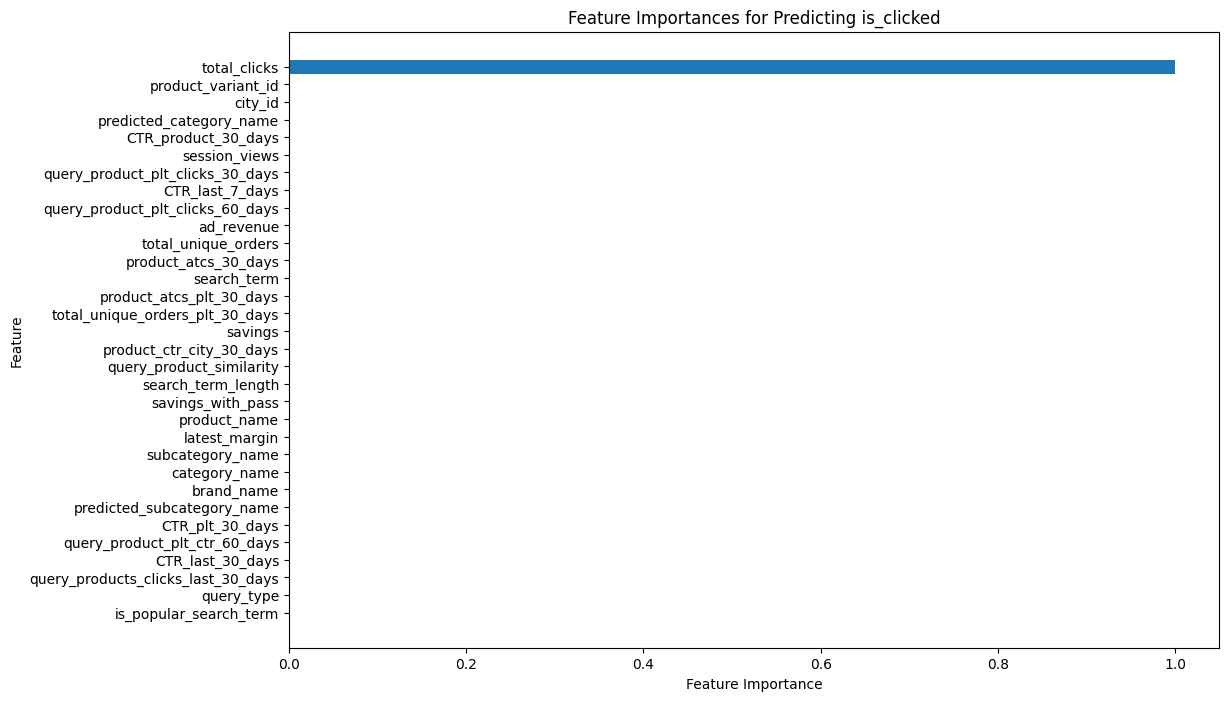

Top features contributing to is_clicked:
                             Feature  Importance
4                       total_clicks    0.999219
1                 product_variant_id    0.000507
2                            city_id    0.000081
13           predicted_category_name    0.000062
9                CTR_product_30_days    0.000037
5                      session_views    0.000028
15  query_product_plt_clicks_30_days    0.000027
8                    CTR_last_7_days    0.000025
10  query_product_plt_clicks_60_days    0.000014
23                        ad_revenue    0.000000


In [ ]:
# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Predicting is_clicked')
plt.gca().invert_yaxis()
plt.show()

print("Top features contributing to is_clicked:")
print(importance_df.head(10))

In [ ]:
# Preprocessing (ensure no nulls in features)
data.dropna(subset=['total_clicks', 'is_clicked'], inplace=True)

# Define features and target variable
X = data[['total_clicks']]  # Feature
y = data['is_clicked']       # Target variable

# Convert 'is_clicked' to integer labels if it contains continuous values
if y.dtype != 'int':
    y = y.astype(int)

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70393
           1       1.00      1.00      1.00     30607

    accuracy                           1.00    101000
   macro avg       1.00      1.00      1.00    101000
weighted avg       1.00      1.00      1.00    101000



In [ ]:
print(data['is_clicked'].value_counts())
print(y_train.value_counts())
print(y_test.value_counts())


is_clicked
0.000000    352080
1.000000    152909
0.078096         3
0.261305         1
0.152941         1
0.177083         1
0.109369         1
Name: count, dtype: int64
is_clicked
0    281694
1    122302
Name: count, dtype: int64
is_clicked
0    70393
1    30607
Name: count, dtype: int64


In [ ]:
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)


In [ ]:
# Display the original shape of the dataset
print("Original dataset shape:", data.shape)

# Remove rows where 'is_clicked' is not 0 or 1
data_cleaned = data[(data['is_clicked'] == 0) | (data['is_clicked'] == 1)]

# Display the cleaned shape of the dataset
print("Cleaned dataset shape:", data_cleaned.shape)

# Optionally, save the cleaned dataset to a new CSV file
data_cleaned.to_csv('cleaned_dataset.csv', index=False)


Original dataset shape: (504996, 33)
Cleaned dataset shape: (504989, 33)


In [ ]:
import pandas as pd

# Check distribution in the original dataset
print("Original Target Distribution:\n", data['is_clicked'].value_counts())

# Check distribution in the training set
print("Training Target Distribution:\n", y_train.value_counts())

# Check distribution in the testing set
print("Testing Target Distribution:\n", y_test.value_counts())


Original Target Distribution:
 is_clicked
0.000000    352080
1.000000    152909
0.078096         3
0.261305         1
0.152941         1
0.177083         1
0.109369         1
Name: count, dtype: int64
Training Target Distribution:
 is_clicked
0    281694
1    122302
Name: count, dtype: int64
Testing Target Distribution:
 is_clicked
0    70393
1    30607
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Fit the model to get feature importances
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

print('Feature Importances:')
print(feature_importance)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import randint
import logging
from time import time

In [ ]:
# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

# Define the features (excluding specified columns)
numerical_features = [
    'total_clicks', 'session_views', 'query_products_clicks_last_30_days',
    'CTR_last_30_days', 'CTR_last_7_days', 'CTR_product_30_days',
    'query_product_plt_clicks_60_days', 'query_product_plt_ctr_60_days',
    'CTR_plt_30_days', 'query_product_plt_clicks_30_days', 'latest_margin',
    'savings', 'savings_with_pass', 'ad_revenue', 'total_unique_orders',
    'total_unique_orders_plt_30_days', 'product_ctr_city_30_days',
    'query_product_similarity'
]

categorical_features = [
    'search_term', 'city_id', 'product_variant_id', 'query_type',
    'predicted_category_name', 'predicted_subcategory_name',
    'category_name', 'subcategory_name'
]

# Define the target
target = 'is_clicked'

# Split the data into features and target
X = data[numerical_features + categorical_features]
y = data[target]

# Handle any missing values
X = X.fillna(0)
y = y.fillna(0)

# Convert the target to integer if it's not already
if y.dtype != 'int':
    y = y.astype(int)

# Subsample the data for quicker processing
subsample_size = 100000  # Adjust this value based on available resources
X_subsample, _, y_subsample, _ = train_test_split(X, y, train_size=subsample_size, random_state=42, stratify=y)

# Preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': randint(100, 300),
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__bootstrap': [True, False]
}

# Define the cross-validation object
cv = StratifiedKFold(n_splits=3)

# Initialize RandomizedSearchCV with the cross-validation object
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=2, cv=cv, n_jobs=-1, verbose=2, random_state=42)

# Split the subsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Fit RandomizedSearchCV
start_time = time()
random_search.fit(X_train, y_train)
end_time = time()

# Log the time taken
logging.info("Completed in {:.2f} seconds".format(end_time - start_time))

# Get the best model
best_model = random_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Print the best hyperparameters
print('Best Hyperparameters:', random_search.best_params_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Accuracy: 0.92
Confusion Matrix:
[[13932     0]
 [ 1632  4436]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     13932
           1       1.00      0.73      0.84      6068

    accuracy                           0.92     20000
   macro avg       0.95      0.87      0.89     20000
weighted avg       0.93      0.92      0.91     20000

Best Hyperparameters: {'classifier__bootstrap': True, 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 206}


IMPLEMENTING A DIN MODEL (PART OF NEURAL NETWORKS)

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Dot, Activation, Concatenate, Multiply
from tensorflow.keras.optimizers import Adam

# Load and preprocess your dataset
def preprocess_data(data):
    print(f"Initial data shape: {data.shape}")

    # Convert categorical features to numerical codes
    categorical_columns = ['query_type', 'predicted_category_name', 'predicted_subcategory_name', 'category_name', 'subcategory_name']
    for col in categorical_columns:
        if col in data.columns:
            data[col] = data[col].astype('category').cat.codes
        else:
            print(f"Warning: Column {col} not found in data")

    print(f"Shape after categorical conversion: {data.shape}")

    # Handle any non-numeric values or unique identifiers
    non_numeric_columns = ['city_id', 'product_variant_id']
    for col in non_numeric_columns:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')
        else:
            print(f"Warning: Column {col} not found in data")

    print(f"Shape after numeric conversion: {data.shape}")

    # Instead of dropping, fill NaN values with mean
    data = data.fillna(data.mean())

    print(f"Final shape after filling NaN values: {data.shape}")

    return data

# Assume 'data' is loaded from somewhere
# data = pd.read_csv('your_data.csv')  # Uncomment and modify this line to load your actual data

# Preprocessing the dataset
data = preprocess_data(data)

print(f"Final data shape: {data.shape}")

# Define feature columns (toggled as requested)
item_features = ['query_type', 'city_id', 'product_variant_id']
user_features = ['total_clicks', 'session_views', 'query_products_clicks_last_30_days', 'CTR_last_30_days',
                 'CTR_last_7_days', 'CTR_product_30_days', 'query_product_plt_clicks_60_days', 'query_product_plt_ctr_60_days',
                 'CTR_plt_30_days', 'predicted_category_name', 'predicted_subcategory_name', 'query_product_plt_clicks_30_days', 'category_name', 'subcategory_name', 'latest_margin', 'savings',
                 'savings_with_pass', 'ad_revenue', 'total_unique_orders', 'product_ctr_city_30_days', 'query_product_similarity']

# Extract features and target
X_user = data[user_features].values.astype(np.float32)
X_item = data[item_features].values.astype(np.float32)
y = data['is_clicked'].values.astype(np.float32)

print(f"X_user shape: {X_user.shape}")
print(f"X_item shape: {X_item.shape}")
print(f"y shape: {y.shape}")

# Define input dimensions
user_input_dim = len(user_features)
item_input_dim = len(item_features)

# DIN model architecture
def create_din_model(user_input_dim, item_input_dim):
    # Define inputs
    user_input = Input(shape=(user_input_dim,), name='user_input')
    item_input = Input(shape=(item_input_dim,), name='item_input')

    # Embedding layers
    user_embedding = Dense(64, activation='relu')(user_input)
    item_embedding = Dense(64, activation='relu')(item_input)

    # Attention mechanism
    attention = Dot(axes=1)([user_embedding, item_embedding])
    attention = Activation('softmax')(attention)
    attention_output = Multiply()([attention, item_embedding])

    # Concatenate with original embeddings
    concatenated = Concatenate()([user_embedding, attention_output])
    x = Dense(128, activation='relu')(concatenated)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)

    # Create model
    model = Model(inputs=[user_input, item_input], outputs=output)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create and summarize the model
model = create_din_model(user_input_dim, item_input_dim)
model.summary()

# Train the model
history = model.fit([X_user, X_item], y, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate([X_user, X_item], y)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Initial data shape: (0, 33)
Shape after categorical conversion: (0, 33)
Shape after numeric conversion: (0, 33)
Final shape after filling NaN values: (0, 33)
Final data shape: (0, 33)
X_user shape: (0, 21)
X_item shape: (0, 3)
y shape: (0,)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user_input (InputLayer)     [(None, 21)]                 0         []                            
                                                                                                  
 item_input (InputLayer)     [(None, 3)]                  0         []                            
                                                                                                  
 dense_28 (Dense)            (None, 64)                   1408      ['user_input[0][0]']          
                                                 

ValueError: Training data contains 0 samples, which is not sufficient to split it into a validation and training set as specified by `validation_split=0.2`. Either provide more data, or a different value for the `validation_split` argument.